# Rancho Cordova: Opportunity and Need for Workforce Transformation 

## <font color='green'>Longterm Industry Employment Projections EDA</font>

#### Import pandas, matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.rcParams['figure.figsize'] = (9, 8)
# plt.rcParams['font.size'] = 12

In [3]:
ls data

Long_Term_Industry_Employment_Projections.csv
Long_Term_Occupational_Employment_Projections.csv
NAICS_Industry_Codes.csv


#### Read in CSV files

In [4]:
industry_proj = pd.read_csv('data/Long_Term_Industry_Employment_Projections.csv')

Reference data dictionary [here](https://data.edd.ca.gov/Employment-Projections/Long-Term-Industry-Employment-Projections/sp6i-jezb)

In [5]:
naics_industry_codes = pd.read_csv('data/NAICS_Industry_Codes.csv')

Reference data dictionary [here](https://www.bls.gov/ces/naics/#2.3)

Display all columns

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## 1: Exploring the data

In [7]:
naics_industry_codes.shape

(879, 7)

In [8]:
naics_industry_codes.head()

,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
0,0,-,B,Total nonfarm,0,T,1
1,5000000,-,A,Total private,1,T,2
2,6000000,-,A,Goods-producing,1,T,3
3,7000000,-,B,Service-providing,1,T,4
4,8000000,-,A,Private service-providing,1,T,5


In [9]:
pd.DataFrame(naics_industry_codes.dtypes, columns=['DataTypes'])

,DataTypes
industry_code,int64
naics_code,object
publishing_status,object
industry_name,object
display_level,int64
selectable,object
sort_sequence,int64


In [10]:
industry_proj.shape

(1768, 9)

In [11]:
industry_proj.head()

,Area Type,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD (Orange County),2018-2028,1,Total Employment,1764000,1890300,126300,7.2
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD (Orange County),2018-2028,6010,Self Employment,109100,117300,7500,6.9
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD (Orange County),2018-2028,8010,Private Household Workers,1700,1600,-100,-5.9
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD (Orange County),2018-2028,11000000,Total Farm,2000,1900,-100,-5.0
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD (Orange County),2018-2028,0,Total Nonfarm,1651200,1769500,118300,7.2


In [12]:
industry_proj.tail()

,Area Type,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change
1763,Metropolitan Area,Yuba City MSA (Sutter and Yuba Counties),2018-2028,90910000,Federal Government,1600,1600,0,0.0
1764,Metropolitan Area,Yuba City MSA (Sutter and Yuba Counties),2018-2028,90940000,State and Local Government,9900,11300,1400,14.1
1765,Metropolitan Area,Yuba City MSA (Sutter and Yuba Counties),2018-2028,90920000,State Government,1000,1100,100,10.0
1766,Metropolitan Area,Yuba City MSA (Sutter and Yuba Counties),2018-2028,90930000,Local Government,8900,10200,1300,14.6
1767,Metropolitan Area,Yuba City MSA (Sutter and Yuba Counties),2018-2028,90932000,Local Government Excluding Education,2800,4200,1400,50.0


In [13]:
industry_proj.columns

Index(['Area Type', 'Area Name (County Names)', 'Period', 'Series Code',
       'Industry Title', 'Base Year Employment Estimate',
       'Projected Year Employment Estimate', 'Numeric Change',
       'Percentage Change'],
      dtype='object')

In [14]:
pd.DataFrame(industry_proj.dtypes, columns=['DataTypes'])

,DataTypes
Area Type,object
Area Name (County Names),object
Period,object
Series Code,int64
Industry Title,object
Base Year Employment Estimate,int64
Projected Year Employment Estimate,int64
Numeric Change,int64
Percentage Change,float64


In [15]:
industry_proj.describe()

,Series Code,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change
count,1.768000e+03,1.768000e+03,1.768000e+03,1.768000e+03,1768.000000
mean,5.119107e+07,1.065553e+05,1.157889e+05,9.233614e+03,5.987104
std,2.584855e+07,6.679997e+05,7.261362e+05,6.025097e+04,13.269305
min,0.000000e+00,4.000000e+01,4.000000e+01,-4.030000e+04,-50.000000
25%,3.232200e+07,7.100000e+03,7.200000e+03,1.000000e+02,0.600000
50%,5.500000e+07,1.805000e+04,1.900000e+04,8.000000e+02,5.650000
75%,7.000000e+07,5.340000e+04,5.812500e+04,4.000000e+03,11.300000
max,9.094000e+07,1.882590e+07,2.041250e+07,1.586600e+06,200.000000


In [102]:
pd.DataFrame(industry_proj['Area Name (County Names)'].unique(), columns=['Area Name (County Names)'])

,Area Name (County Names)
0,Anaheim-Santa Ana-Irvine MD (Orange County)
1,Bakersfield MSA (Kern County)
2,California
3,Chico MSA (Butte County)
4,"Eastern Sierra-Mother Lode Region (Alpine, Ama..."
5,El Centro MSA (Imperial County)
6,Fresno MSA (Fresno County)
7,Hanford-Corcoran MSA (Kings County)
8,Los Angeles-Long Beach-Glendale MD (Los Angele...
9,Madera MSA (Madera County)


## 2: Cleaning and preparing the data

#### Creating a dataframe of records for Sacramento county only, where Rancho Cordova is located

In [17]:
sacramento_industry_proj = industry_proj[industry_proj['Area Name (County Names)'] == 'Sacramento--Roseville--Arden-Arcade MSA (El Dorado, Placer, Sacramento, and Yolo Counties)'].copy()
sacramento_industry_proj.shape

(72, 9)

In [18]:
sacramento_industry_proj.describe()

,Series Code,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change
count,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,72.000000
mean,5.164314e+07,7.150694e+04,7.738333e+04,5876.388889,6.055556
std,2.455226e+07,1.725873e+05,1.870095e+05,15028.578345,8.363837
min,0.000000e+00,5.000000e+02,4.000000e+02,-1100.000000,-20.000000
25%,4.075000e+07,1.087500e+04,1.145000e+04,200.000000,1.450000
50%,5.552205e+07,2.040000e+04,2.150000e+04,1300.000000,5.750000
75%,6.562225e+07,6.382500e+04,7.162500e+04,5725.000000,12.375000
max,9.094000e+07,1.080300e+06,1.170600e+06,90300.000000,26.700000


In [19]:
sacramento_industry_proj.head(72)

,Area Type,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change
1115,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,1,Total Employment,1080300,1170600,90300,8.4
1116,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9
1117,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0
1118,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0
1119,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,0,Total Nonfarm,998300,1082800,84500,8.5
...,...,...,...,...,...,...,...,...,...
1182,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90921611,State Government Education,31000,32900,1900,6.1
1183,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90922000,State Government Excluding Education,89400,90200,800,0.9
1184,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90930000,Local Government,103500,106700,3200,3.1
1185,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90931611,Local Government Education,56400,58000,1600,2.8


#### Industry titles according to the North American Industry Classification System (NAICS) . Industry codes [here](https://download.bls.gov/pub/time.series/ce/ce.industry)

#### Need to be able to view the industries by hierarchy. Will left join Sacramentro Industry Projections dataframe with NAICS Code dataframes to bring in `display_level` column

In [20]:
sac_industry_proj = pd.merge(sacramento_industry_proj,naics_industry_codes,left_on='Series Code',right_on='industry_code',how='left')

In [21]:
sac_industry_proj.head()

,Area Type,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
0,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,1,Total Employment,1080300,1170600,90300,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Metropolitan Area,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,0,Total Nonfarm,998300,1082800,84500,8.5,0.0,-,B,Total nonfarm,0.0,T,1.0


In [22]:
sac_industry_proj.shape

(72, 16)

#### Dropping columns I don't need

In [23]:
columns_to_delete = ['Area Type', 'publishing_status', 'selectable']

In [24]:
sac_industry_proj.drop(columns_to_delete, inplace=True, axis=1)

In [25]:
sac_industry_proj

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
0,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,1,Total Employment,1080300,1170600,90300,8.4,NaN,NaN,NaN,NaN,NaN
1,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9,NaN,NaN,NaN,NaN,NaN
2,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0,NaN,NaN,NaN,NaN,NaN
3,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0,NaN,NaN,NaN,NaN,NaN
4,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,0,Total Nonfarm,998300,1082800,84500,8.5,0.0,-,Total nonfarm,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90921611,State Government Education,31000,32900,1900,6.1,90921611.0,-,State government education,4.0,867.0
68,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90922000,State Government Excluding Education,89400,90200,800,0.9,90922000.0,-,"State government, excluding education",4.0,868.0
69,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90930000,Local Government,103500,106700,3200,3.1,90930000.0,-,Local government,3.0,872.0
70,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90931611,Local Government Education,56400,58000,1600,2.8,90931611.0,-,Local government education,4.0,873.0


In [73]:
sac_industry_proj.columns

Index(['Area Name (County Names)', 'Period', 'Series Code', 'Industry Title',
       'Base Year Employment Estimate', 'Projected Year Employment Estimate',
       'Numeric Change', 'Percentage Change', 'industry_code', 'naics_code',
       'industry_name', 'display_level', 'sort_sequence'],
      dtype='object')

#### Checking for number of unique values

In [26]:
sac_industry_proj.nunique()

Area Name (County Names)               1
Period                                 1
Series Code                           72
Industry Title                        72
Base Year Employment Estimate         72
Projected Year Employment Estimate    68
Numeric Change                        47
Percentage Change                     62
industry_code                         66
naics_code                            47
industry_name                         64
display_level                          5
sort_sequence                         66
dtype: int64

#### Checking for null values

In [27]:
print(sac_industry_proj.shape)
sac_industry_proj.isnull().sum()

(72, 13)


Area Name (County Names)              0
Period                                0
Series Code                           0
Industry Title                        0
Base Year Employment Estimate         0
Projected Year Employment Estimate    0
Numeric Change                        0
Percentage Change                     0
industry_code                         6
naics_code                            6
industry_name                         6
display_level                         6
sort_sequence                         6
dtype: int64

#### Filtering to show records where `industry_code`, `naics_code`, `industry_name`, `display_level`, or `sort_sequence` is null

In [28]:
sac_industry_proj[(sac_industry_proj['industry_code'].isnull()) |
    (sac_industry_proj['naics_code'].isnull()) |
    (sac_industry_proj['industry_name'].isnull()) |
    (sac_industry_proj['display_level'].isnull()) |
    (sac_industry_proj['sort_sequence'].isnull())]

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
0,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,1,Total Employment,1080300,1170600,90300,8.4,NaN,NaN,NaN,NaN,NaN
1,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9,NaN,NaN,NaN,NaN,NaN
2,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0,NaN,NaN,NaN,NaN,NaN
3,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0,NaN,NaN,NaN,NaN,NaN
18,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,41000000,Wholesale Trade,28400,29200,800,2.8,NaN,NaN,NaN,NaN,NaN
65,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90940000,State and Local Government,223800,229800,6000,2.7,NaN,NaN,NaN,NaN,NaN


#### How to handle records where values are null
* *Total Employment* - ignore, leave nulls as is since this is a topline number
* *Self Employment* - impute *1* for `display_level`. NAICS code data has *Total private*, *Goods-producing*, *Service-providing*, *Private service-providing* as *1* for `display_level`
* *Private Household Workers* - impute *1* for `display_level`. NAICS code data has *Total private*, *Goods-producing*, *Service-providing*, *Private service-providing* as *1* for `display_level`
* *Total Farm* - impute *0* for `display_level`. NAICS code data has *Total nonfarm* as *0* for `display_level`
* *Wholesale Trade* - impute *3* for `display_level`. NAICS code data has a record for *Wholesale trade* although the `Series Code` value isn't an exact match to the `industry_code` value, but this is fine for categorizing purposes
* *State and Local Government* - impute *3* for `display_level`. NAICS code data has records for *State government* and *Local government* with the `display_level` set to *3*

#### Imputing values

In [29]:
sac_industry_proj.at[1, 'display_level'] = 1

In [30]:
sac_industry_proj.at[2, 'display_level'] = 1

In [31]:
sac_industry_proj.at[3, 'display_level'] = 0

In [32]:
sac_industry_proj.at[18, 'display_level'] = 3

In [33]:
sac_industry_proj.at[65, 'display_level'] = 3

#### Checking records for imputed values

In [41]:
sac_industry_proj.iloc[[0, 1, 2, 3, 18, 65]]

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
0,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,1,Total Employment,1080300,1170600,90300,8.4,NaN,NaN,NaN,NaN,NaN
1,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9,NaN,NaN,NaN,1.0,NaN
2,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0,NaN,NaN,NaN,1.0,NaN
3,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0,NaN,NaN,NaN,0.0,NaN
18,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,41000000,Wholesale Trade,28400,29200,800,2.8,NaN,NaN,NaN,3.0,NaN
65,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,90940000,State and Local Government,223800,229800,6000,2.7,NaN,NaN,NaN,3.0,NaN


#### Checking value counts

In [47]:
sac_industry_proj['display_level'].value_counts(dropna=False)

4.0    28
3.0    18
2.0    11
5.0    10
0.0     2
1.0     2
NaN     1
Name: display_level, dtype: int64

#### Creating additional dataframes to more easily look at data by `display_level` (0, 1, 2, 3, 4). NAICS classifies each business into a detailed industry based on the production processes it uses.

More details [here](https://www.bls.gov/ces/naics/#2.4)

#### `display_level` 0

In [53]:
sac_industry_proj_dis0 = sac_industry_proj[sac_industry_proj['display_level'] == 0].copy()
sac_industry_proj_dis0.shape

(2, 13)

In [54]:
sac_industry_proj_dis0.head()

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
3,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,11000000,Total Farm,9100,9100,0,0.0,NaN,NaN,NaN,0.0,NaN
4,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,0,Total Nonfarm,998300,1082800,84500,8.5,0.0,-,Total nonfarm,0.0,1.0


#### `display_level` 1

In [55]:
sac_industry_proj_dis1 = sac_industry_proj[sac_industry_proj['display_level'] == 1].copy()
sac_industry_proj_dis1.shape

(2, 13)

In [56]:
sac_industry_proj_dis1.head()

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
1,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,6010,Self Employment,71900,77600,5700,7.9,NaN,NaN,NaN,1.0,NaN
2,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,8010,Private Household Workers,1000,1100,100,10.0,NaN,NaN,NaN,1.0,NaN


#### `display_level` 2

In [57]:
sac_industry_proj_dis2 = sac_industry_proj[sac_industry_proj['display_level'] == 2].copy()
sac_industry_proj_dis2.shape

(11, 13)

In [61]:
sac_industry_proj_dis2.head()

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
5,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,10000000,Mining and Logging,500,400,-100,-20.0,10000000.0,-,Mining and logging,2.0,6.0
6,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,20000000,Construction,64500,71500,7000,10.9,20000000.0,23,Construction,2.0,24.0
12,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,30000000,Manufacturing,36000,36200,200,0.6,30000000.0,-,Manufacturing,2.0,76.0
17,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,40000000,"Trade, Transportation, and Utilities",159900,168900,9000,5.6,40000000.0,-,"Trade, transportation, and utilities",2.0,305.0
30,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,50000000,Information,12400,11800,-600,-4.8,50000000.0,51,Information,2.0,504.0


#### This looks like a good level of information at the industry level to look at

#### `display_level` 3

In [62]:
sac_industry_proj_dis3 = sac_industry_proj[sac_industry_proj['display_level'] == 3].copy()
sac_industry_proj_dis3.shape

(18, 13)

In [66]:
sac_industry_proj_dis3.head()

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
13,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,31000000,Durable Goods Manufacturing,23200,23400,200,0.9,31000000.0,-,Durable goods,3.0,77.0
15,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,32000000,Nondurable Goods Manufacturing,12700,12800,100,0.8,32000000.0,-,Nondurable goods,3.0,220.0
18,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,41000000,Wholesale Trade,28400,29200,800,2.8,NaN,NaN,NaN,3.0,NaN
21,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,42000000,Retail Trade,102000,102200,200,0.2,42000000.0,-,Retail trade,3.0,368.0
29,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,43000000,"Transportation, Warehousing, and Utilities",29600,37500,7900,26.7,43000000.0,-,Transportation and warehousing,3.0,453.0


#### If data at `display_level` 2 isn't descriptive enough, we can explore drilling down into 3, but will need to likely set up some sort of data tree to show the hierarchy

#### `display_level` 4

In [67]:
sac_industry_proj_dis4 = sac_industry_proj[sac_industry_proj['display_level'] == 4].copy()
sac_industry_proj_dis4.shape

(28, 13)

In [68]:
sac_industry_proj_dis4.head()

,Area Name (County Names),Period,Series Code,Industry Title,Base Year Employment Estimate,Projected Year Employment Estimate,Numeric Change,Percentage Change,industry_code,naics_code,industry_name,display_level,sort_sequence
7,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,20236000,Construction of Buildings,13700,15500,1800,13.1,20236000.0,236,Construction of buildings,4.0,25.0
8,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,20238000,Specialty Trade Contractors,44400,49100,4700,10.6,20238000.0,238,Specialty trade contractors,4.0,42.0
14,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,31334000,Computer and Electronic Product Manufacturing,4500,4800,300,6.7,31334000.0,334,Computer and electronic products,4.0,149.0
16,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,32311000,Food Manufacturing,4300,4200,-100,-2.3,32311000.0,311,Food manufacturing,4.0,221.0
19,Sacramento--Roseville--Arden-Arcade MSA (El Do...,2018-2028,41423000,"Merchant Wholesalers, Durable Goods",15900,16300,400,2.5,41423000.0,423,Durable goods,4.0,307.0


## 3: Analyzing relationship between variables

#### Correlation matrix

In [69]:
correlation = sac_industry_proj.corr()

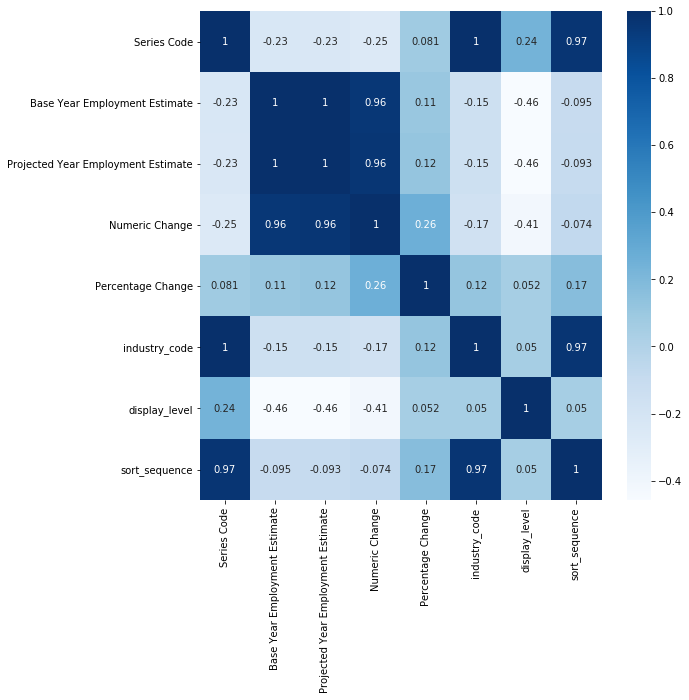

In [71]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap="Blues");

#### Pairplot

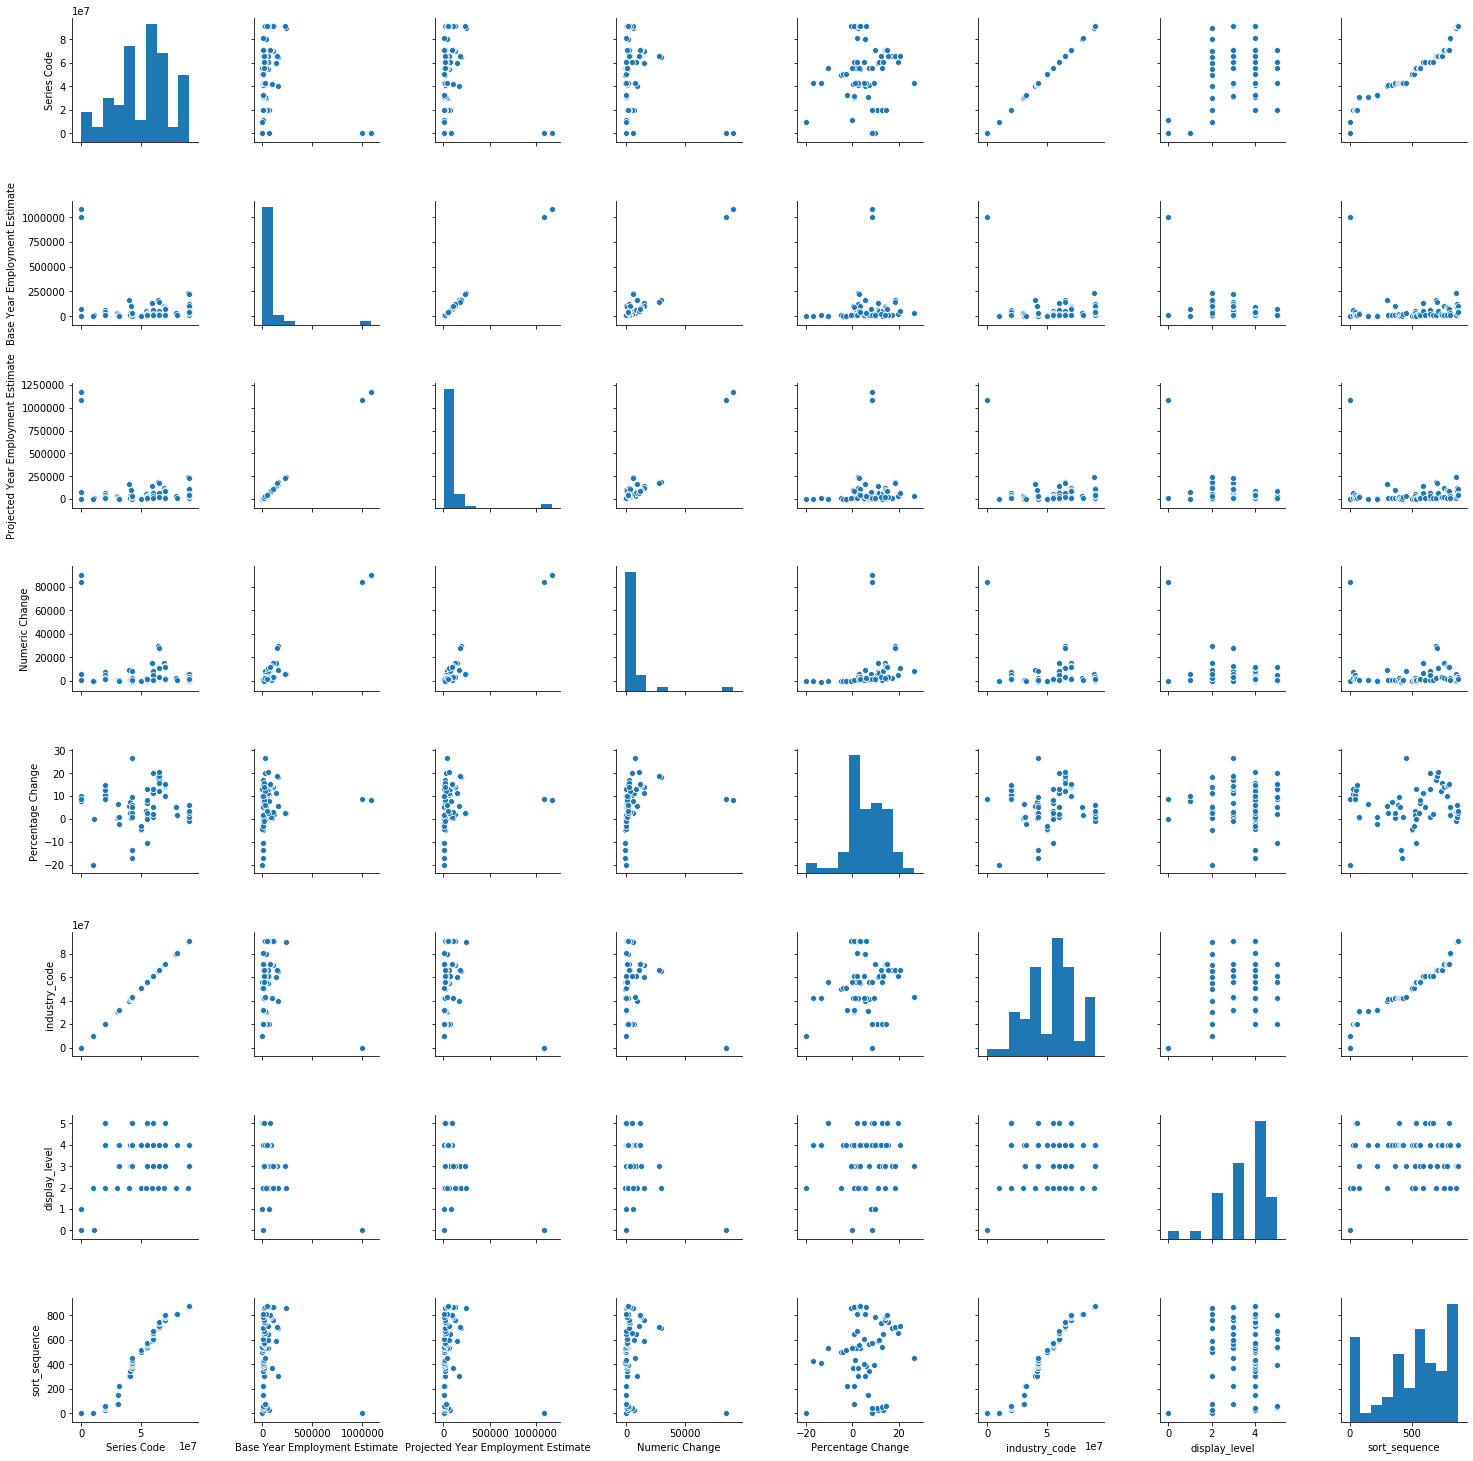

In [72]:
sns.pairplot(sac_industry_proj);

#### Scatter plot shows the relationship between two numerical variables

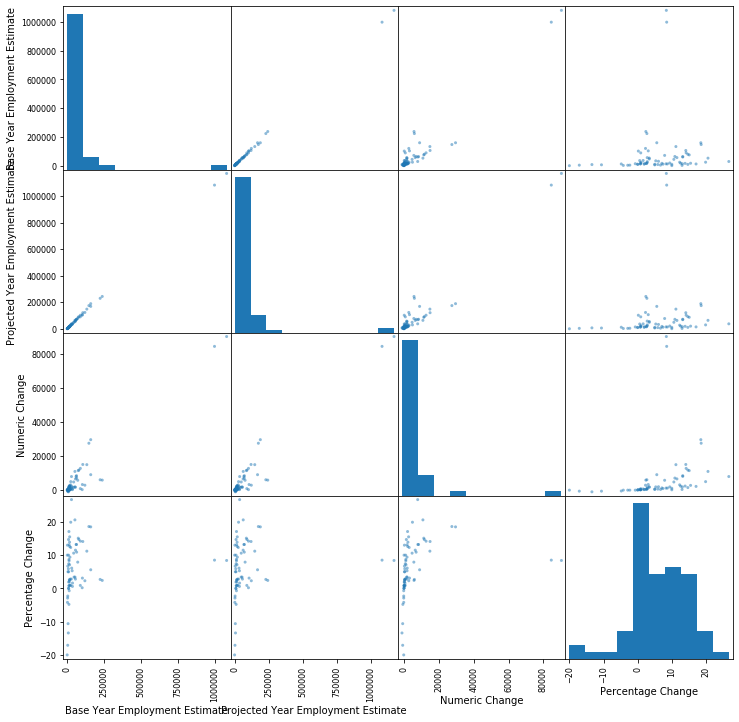

In [83]:
pd.plotting.scatter_matrix(
    sac_industry_proj[['Base Year Employment Estimate', 'Projected Year Employment Estimate',
       'Numeric Change', 'Percentage Change']],
    figsize=(12, 12)
);

#### Histograms

In [98]:
sac_industry_proj.columns

Index(['Area Name (County Names)', 'Period', 'Series Code', 'Industry Title',
       'Base Year Employment Estimate', 'Projected Year Employment Estimate',
       'Numeric Change', 'Percentage Change', 'industry_code', 'naics_code',
       'industry_name', 'display_level', 'sort_sequence'],
      dtype='object')

Disable auto-scrolling

In [104]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

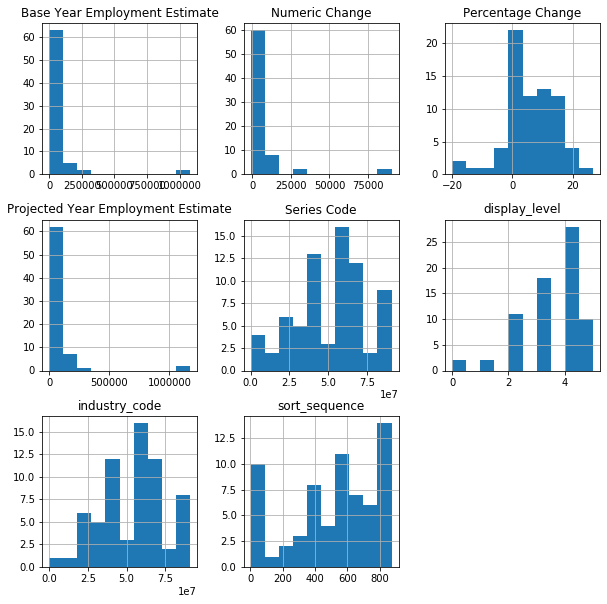

In [101]:
sac_industry_proj.hist(figsize=(10,10));

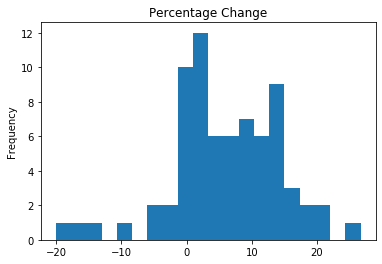

In [107]:
sac_industry_proj['Percentage Change'].plot(kind='hist', bins=20)
#plt.ylabel('ylabel')
#plt.xlabel('xlabel')
plt.title('Percentage Change');